In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
products = pd.read_csv('amazon_baby_subset.csv')

In [3]:
products

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1
...,...,...,...,...
53067,"Samsung Baby Care Washer, Stainless Platinum, ...","My infant goes to a really crappy daycare, and...",1,-1
53068,"Mud Pie Milestone Stickers, Boy",Pretty please open and inspect these stickers ...,1,-1
53069,Best BIB for Baby - Soft Bib (Pink-Elephant),Great 5-Star Product but An Obvious knock-off ...,1,-1
53070,Bouncy&reg; Inflatable Real Feel Hopping Cow,When I received the item my initial thought wa...,2,-1


In [4]:
products.dtypes

name         object
review       object
rating        int64
sentiment     int64
dtype: object

In [5]:
products.isna().sum()

name          90
review       241
rating         0
sentiment      0
dtype: int64

In [6]:
products.dropna(inplace = True)

In [7]:
products.isna().sum()

name         0
review       0
rating       0
sentiment    0
dtype: int64

In [8]:
products.shape

(52741, 4)

In [9]:
print("Number od positive reviews:", sum(products["sentiment"]==1))
print("Number od negative reviews:", sum(products["sentiment"]==-1))

Number od positive reviews: 26380
Number od negative reviews: 26361


In [10]:
with open("important_words.json", "r") as f:
    important_words = json.load(f)
print(important_words)

['baby', 'one', 'great', 'love', 'use', 'would', 'like', 'easy', 'little', 'seat', 'old', 'well', 'get', 'also', 'really', 'son', 'time', 'bought', 'product', 'good', 'daughter', 'much', 'loves', 'stroller', 'put', 'months', 'car', 'still', 'back', 'used', 'recommend', 'first', 'even', 'perfect', 'nice', 'bag', 'two', 'using', 'got', 'fit', 'around', 'diaper', 'enough', 'month', 'price', 'go', 'could', 'soft', 'since', 'buy', 'room', 'works', 'made', 'child', 'keep', 'size', 'small', 'need', 'year', 'big', 'make', 'take', 'easily', 'think', 'crib', 'clean', 'way', 'quality', 'thing', 'better', 'without', 'set', 'new', 'every', 'cute', 'best', 'bottles', 'work', 'purchased', 'right', 'lot', 'side', 'happy', 'comfortable', 'toy', 'able', 'kids', 'bit', 'night', 'long', 'fits', 'see', 'us', 'another', 'play', 'day', 'money', 'monitor', 'tried', 'thought', 'never', 'item', 'hard', 'plastic', 'however', 'disappointed', 'reviews', 'something', 'going', 'pump', 'bottle', 'cup', 'waste', 'retu

In [11]:
len(important_words)

193

In [12]:
products["review"][10]

'We found this book at a rummage sale and found it to be so useful, especially when several people are helping with the baby (ex: visiting family, etc.)  We loved it so much that I\'ve bought another one and have almost filled that one too.  I like having the room to write things about our baby\'s day and development, plus use the "Notes" section to write some story, etc.  It also helps "Dad" see what has happened that day and feels more connected.  I will be buying another one soon!'

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuation(text):
    import string
    return text.translate(str.maketrans("", "", string.punctuation))


In [16]:
products["review_clean"] = products["review"].apply(remove_punctuation)

In [17]:
products

,name,review,rating,sentiment,review_clean
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...
...,...,...,...,...,...
53067,"Samsung Baby Care Washer, Stainless Platinum, ...","My infant goes to a really crappy daycare, and...",1,-1,My infant goes to a really crappy daycare and ...
53068,"Mud Pie Milestone Stickers, Boy",Pretty please open and inspect these stickers ...,1,-1,Pretty please open and inspect these stickers ...
53069,Best BIB for Baby - Soft Bib (Pink-Elephant),Great 5-Star Product but An Obvious knock-off ...,1,-1,Great 5Star Product but An Obvious knockoff of...
53070,Bouncy&reg; Inflatable Real Feel Hopping Cow,When I received the item my initial thought wa...,2,-1,When I received the item my initial thought wa...


In [18]:
products["review_clean"][100]

'This product was exactly what I needed I could not find one locally  my only choice was to drive to another larger town'

In [19]:
products["review_clean"].str.count("baby")

0        0
1        0
2        1
3        1
4        0
        ..
53067    2
53068    0
53069    0
53070    0
53071    0
Name: review_clean, Length: 52741, dtype: int64

In [20]:
print(important_words)

['baby', 'one', 'great', 'love', 'use', 'would', 'like', 'easy', 'little', 'seat', 'old', 'well', 'get', 'also', 'really', 'son', 'time', 'bought', 'product', 'good', 'daughter', 'much', 'loves', 'stroller', 'put', 'months', 'car', 'still', 'back', 'used', 'recommend', 'first', 'even', 'perfect', 'nice', 'bag', 'two', 'using', 'got', 'fit', 'around', 'diaper', 'enough', 'month', 'price', 'go', 'could', 'soft', 'since', 'buy', 'room', 'works', 'made', 'child', 'keep', 'size', 'small', 'need', 'year', 'big', 'make', 'take', 'easily', 'think', 'crib', 'clean', 'way', 'quality', 'thing', 'better', 'without', 'set', 'new', 'every', 'cute', 'best', 'bottles', 'work', 'purchased', 'right', 'lot', 'side', 'happy', 'comfortable', 'toy', 'able', 'kids', 'bit', 'night', 'long', 'fits', 'see', 'us', 'another', 'play', 'day', 'money', 'monitor', 'tried', 'thought', 'never', 'item', 'hard', 'plastic', 'however', 'disappointed', 'reviews', 'something', 'going', 'pump', 'bottle', 'cup', 'waste', 'retu

In [30]:
# Tính toán số lần cho số lần xảy ra trong đánh giá
for word in important_words:
    products[word] = products['review_clean'].str.count(word)

In [31]:
products

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53067,"Samsung Baby Care Washer, Stainless Platinum, ...","My infant goes to a really crappy daycare, and...",1,-1,My infant goes to a really crappy daycare and ...,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53068,"Mud Pie Milestone Stickers, Boy",Pretty please open and inspect these stickers ...,1,-1,Pretty please open and inspect these stickers ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53069,Best BIB for Baby - Soft Bib (Pink-Elephant),Great 5-Star Product but An Obvious knock-off ...,1,-1,Great 5Star Product but An Obvious knockoff of...,0,2,0,0,1,...,0,0,0,0,0,0,1,0,0,0
53070,Bouncy&reg; Inflatable Real Feel Hopping Cow,When I received the item my initial thought wa...,2,-1,When I received the item my initial thought wa...,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(products, test_size=0.2, random_state = 1)

In [34]:
print(train_data.shape)
print(validation_data.shape)
print(products.shape)

(42192, 198)
(10549, 198)
(52741, 198)


In [35]:
def get_numpy_data(df, features, label):
    df["intercept"] = 1
    features = ["intercept"] + features
    #chuyển đổi khung dữ liệu thành numpy
    feature_matrix = df[features].values
    label_array = df[label].values
    return (feature_matrix, label_array)

In [36]:
feature_matrix, sentiment = get_numpy_data(train_data, important_words, "sentiment")
feature_matrix.shape

(42192, 194)

In [55]:
def predict_probability(coefficients, feature_matrix):
    # Compute P(y_i = +1 | x_i, w) using the link function
    predictions = 1/(1+np.exp(-np.dot(coefficients, feature_matrix)))
    return predictions

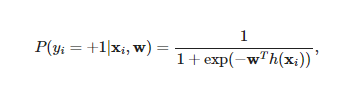

In [40]:
from IPython.display import Image
Image(filename='pic1.png')

In [75]:
#Tính đọa hàm của độ dốc đó
def feature_derivative(errors, features):
    derivative = np.sum(np.dot(errors, features))
    return derivative

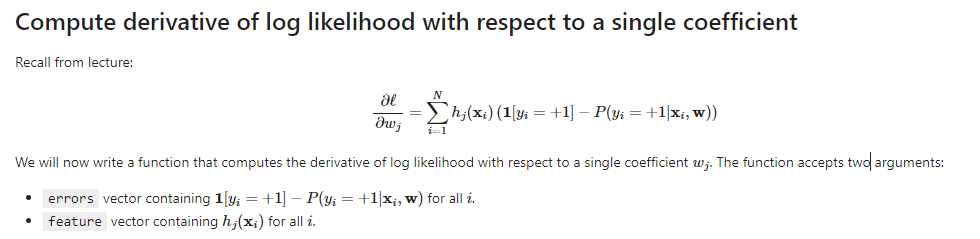

In [41]:
Image(filename='pic2.png')

In [79]:
# Tính bước tính này coi mk đã đi đúng hướng hay chưa
def compute_log_likehood(feature_matrix, sentiment, coefficients):
    # Tính toán toán tử 1
    isone = (sentiment == 1)
    #Thực hiện từng phần
    dotfc = np.dot(feature_matrix, coefficients)
    lnexp = np.log(1+np.exp(-dotfc))#thực hiện logarit
    # Tránh kết quả vô hạn
    mask = np.isinf(lnexp)
    lnexp[mask]=-dotfc[mask]
    #log-likelihood
    ll = sum((isone - 1) * dotfc -lnexp)
    return ll

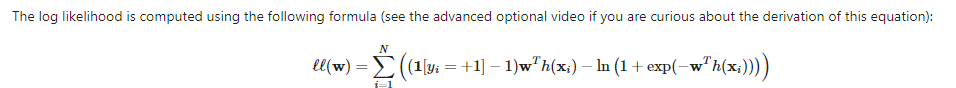

In [43]:
Image(filename='pic3.png')

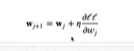

In [46]:
Image(filename='pic4.png')
#Hàm hồi uy logistic

In [80]:
def logistic_regression(fearture_matrix, sentiment, initial_coefficients, step_size = 1, max_iter=301):
    # Đảm bảo các hệ số ban dau là một mảng numpy
    coefficients = np.array(initial_coefficients)
    #Bắt đầu phương pháp gradient và dừng nó trong lần lặp tối đa
    for itr in range(max_iter):
        #đưa ra dự đoán với các hệ số trực tuyến hoặc được cập nhật
        predictions = predict_probability(coefficients, np.transpose(feature_matrix))
        indicator = (sentiment == 1)
        errors = indicator - predictions
    for j in range(len(coefficients)):
        coefficients[j] = coefficients[j] + step_size * feature_derivative(errors, feature_matrix [:, j])
        if itr % 30 == 0:
            ll = compute_log_likehood(feature_matrix, sentiment, coefficients)
            print(f"Iteration {itr}: Log-likehood is {ll}")
    return coefficients

In [81]:
coefficients = logistic_regression(feature_matrix, sentiment, initial_coefficients=np.zeros(194))

Iteration 300: Log-likehood is -1283135.0
Iteration 300: Log-likehood is -2956930.0
Iteration 300: Log-likehood is -23799512.5
Iteration 300: Log-likehood is -21671163.782670178


C:\Users\Admin\AppData\Local\Temp\ipykernel_7092\2647444616.py:7: RuntimeWarning: overflow encountered in exp
  lnexp = np.log(1+np.exp(-dotfc))#thực hiện logarit


Iteration 300: Log-likehood is -21055342.95826698
Iteration 300: Log-likehood is -29797341.009296607
Iteration 300: Log-likehood is -37427332.24329932
Iteration 300: Log-likehood is -37723695.80245593
Iteration 300: Log-likehood is -34288383.63390198
Iteration 300: Log-likehood is -32126806.591324244
Iteration 300: Log-likehood is -31711014.85126147
Iteration 300: Log-likehood is -30121101.606947705
Iteration 300: Log-likehood is -29357437.728628445
Iteration 300: Log-likehood is -33087049.070909884
Iteration 300: Log-likehood is -32729371.91955505
Iteration 300: Log-likehood is -32788565.344359003
Iteration 300: Log-likehood is -32387106.37639982
Iteration 300: Log-likehood is -34357005.60659596
Iteration 300: Log-likehood is -34816012.70003046
Iteration 300: Log-likehood is -37833448.288701914
Iteration 300: Log-likehood is -37845998.15212731
Iteration 300: Log-likehood is -37164605.6204974
Iteration 300: Log-likehood is -37411982.134968266
Iteration 300: Log-likehood is -37477787.91

Iteration 300: Log-likehood is -151849174.387177
Iteration 300: Log-likehood is -151934466.38718316
Iteration 300: Log-likehood is -152058220.01411116
Iteration 300: Log-likehood is -151999697.01932427
Iteration 300: Log-likehood is -152133469.4707378
Iteration 300: Log-likehood is -152222529.9707832
Iteration 300: Log-likehood is -152330284.9707832
Iteration 300: Log-likehood is -152469581.97326502
Iteration 300: Log-likehood is -152567405.97281274
Iteration 300: Log-likehood is -153578560.66362336
Iteration 300: Log-likehood is -153690154.16361722
Iteration 300: Log-likehood is -153780083.66361722
Iteration 300: Log-likehood is -153386436.02844408
Iteration 300: Log-likehood is -153508444.02844408
Iteration 300: Log-likehood is -153440237.54357025
Iteration 300: Log-likehood is -153605118.53330755
Iteration 300: Log-likehood is -153693402.03455445
Iteration 300: Log-likehood is -153613029.6427879
Iteration 300: Log-likehood is -153698944.64686635
Iteration 300: Log-likehood is -15365

In [74]:
feature_matrix[:,1]

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [83]:
pred = predict_probability(feature_matrix_test,coefficients )
pred

NameError: name 'feature_matrix_test' is not defined